In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import Tracks, DenseNetwork, set_seed

In [2]:
name = 'network_03'
tracks = 'tracks_03'
save_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'
load_path = f'/home/ADF/ajl573/Data/interstellar_data/{tracks}'

In [3]:
train = pd.read_csv(f'{load_path}/{tracks}_train.csv')
val = pd.read_csv(f'{load_path}/{tracks}_val.csv')

In [4]:
x_cols = ['log_frac_age_norm', 'log_initial_mass_norm', 'log_initial_MLT_norm', 
          'log_initial_Yinit_norm', 'log_initial_Z_norm', 'frac_he_core_mass_norm']
y_cols = ['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm',
          'log_delta_nu_fit_norm', 'star_feh_norm']

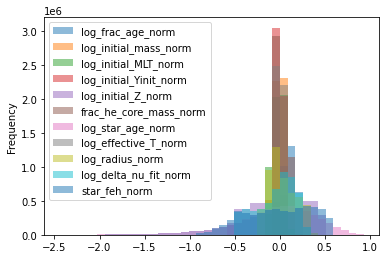

In [5]:
train.plot(kind='hist',
                       y=x_cols+y_cols,
                       bins=40, alpha=0.5)

In [6]:
print(f'Length of training data = {len(train)}')
print(f'Length of validation data = {len(val)}')

Length of training data = 5083245
Length of validation data = 1270811


In [7]:
n_batches = np.arange(500, 2000)  # Select a range where number of batches is reasonable
r = len(train) % n_batches 

# Print whole multiples of training size
print(f'choose number of batches from:\n{n_batches[r==0]}')

choose number of batches from:
[ 555  639  645 1065 1591 1665 1935]


In [8]:
depth = 7
width = 128
activation = 'elu'
batch_size = len(train)//645
regularization_l2 = 0.0
optimizer = 'nadam'
loss = 'mae'
metrics = ['mse']

In [9]:
network = DenseNetwork(path=save_path, name=name, depth=depth, width=width,
                        activation=activation, batch_size=batch_size, regularization_l2=regularization_l2)

In [10]:
network.build(len(x_cols), len(y_cols))

In [11]:
network.compile(optimizer=optimizer, loss=loss, metrics=metrics)
network.save_model()

In [ ]:
network.train(train, x_cols, y_cols, epochs=2000, validation_split=None, validation_data=val,
              callbacks=['checkpoint', 'tensorboard'])

In [ ]:
network.save()

In [ ]:
network.scores(val.sample(20000))

In [ ]:
network.plot_metric(val.sample(20000));